# Project: Investigate FBI GUN DATASET

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

# The provided data set has two different files, one with census data for each state and other with the firearms details for each state. Census data has over 60 parameter for each state for a particular year

# Therefore the common fields between two sheets is the state and the year. We have to analyze this data set using this fields with more interest to give the findings about the firearm data of a particular state for a month or year or so..

## Posing Questions

# 1.What census variable or fact value is most associated with high gun per capita per state? Ceusus data includes state as variable, and there are 65 differnt census measurement as value of Fact. 
# 2.Which states have had the highest growth and the lowest growth in gun registrations from Apr 2010 to Jul 2016? 
# 3.What is the overall trend of gun purchases by year or by year and month?

In [55]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
% matplotlib inline
census = pd.read_csv("US_Census_Data.csv")
gun = pd.read_excel("gun_data.xlsx")


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [56]:
# Load your data and print out a few lines. Perform operations to inspect data

#   types and look for instances of missing or possibly errant data.

# Step 1 Will check the data types of columns in gun data

gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

### Based on the above info() function we could note that there are 12485 rows. There are no rows with all NAN values since there are several columns with 12485 entries.
### There are lot of missing values in many columns for example, 'permit_recheck', 'permit', 'other', 'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other'. The missing values are to be replaced with mean per column before analyzing the data set.
## One more important point to be noted is that the number of guns should be a integer not a float data_type since gun count be in decimal values like 3.5 or 4.5 etc. The data type should be converted to integer from float.

In [57]:
# Lets Check for any duplicated rows in census and gun data in below code;

dup_gun = sum(gun.duplicated())
dup_census = sum(census.duplicated())
print("there are "+ dup_gun.astype(str) +' duplicate rows in gun data')
print("there are "+ dup_census.astype(str) +' duplicate rows in census data')


there are 0 duplicate rows in gun data
there are 3 duplicate rows in census data


### From the above result we could note that there are no duplicate rows in gun_data whereas there are 3 duplicated rows in census data. So we will drop these rows during data cleaning steps.

In [58]:
# Lets check with data types in census dataset also:

census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In [59]:
# lets just have a look at what kind of data is there in census data for better understanding

census.head(3)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%


In [60]:
#WHILE WE OBSERVED WE COULD NOTE THAT FACT NOTE VALUES WERE NAN FOR 3 ROWS ALSO, SO JUST MOVE AHEAD AND FIND THE TOTAL NAN VALUES:

census['Fact Note'].isnull().sum()

57

### Based on the above results of info(), head() and isnull(), we can see the data type of these state columns are string, but they're acutally numbers and some columns with percentage. 
### The string data is to be converted into numeric data type for grouping and calculating for data exploration.
### Out of 65 row data values there are 57 nan values for fact note columns, which should be considered for removing to reduce the missing values for census data.


### Data Cleaning!!! ---- Lets proceed with data cleaning based on basic observation done until now.

In [61]:
# Lets replace NAN field with mean of each column data for gun data

gun = gun.fillna(gun.mean(), axis = 0, inplace = True)


In [62]:
# now testing for above step whether we have done replacement correctle

gun.isnull().sum().sum()


0

### The above cell has returned us 0, which means the that gun data has been replaced with mean values for NAN values for respective columns

In [63]:
### lets drop duplicate rows in census data

census.drop_duplicates(inplace=True)

In [64]:
## now checking for duplicated rows in census data

sum(census.duplicated())

0

### We have now removed the three duplicate rows in census data set, evidence is that we have got 0 output for the above code

In [65]:
# We could note that fact note column had too many missing values , its better to drop this columns so it would not affect the further data analysis.
census.drop('Fact Note', axis = 1, inplace = True)

In [66]:
#after removing the above column, census data should not be consisting any further nan VALUES, led to find below. 
#But found there were 17 rows with no data and I missed that initially. NOw using tail I could find that there was description regarding this dataset in those rows.
census.tail(17)

#SO i would like to drop rows from 65 to end for clear data exploaration

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NOTE: FIPS Code values are enclosed in quotes ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Value Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Fact Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,(a),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,(b),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,(c),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,Value Flags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
#I will select data from 0:64 which gives me required data only... Or i could have gone by removing rows using census.drop(census.index[65,84])

census = census[0:65]

In [68]:
#Now lets check for NAN values in processed census dataset
census.isnull().sum().sum()

0

### Finally I was able to retain the data required for our analysis. As above result indicated that there are no more nan values in census data. Lets go ahead with conversion of data columns into required data type in gun data and census data. Here we go

In [69]:
states = []
for state in census.columns:
    states.append(state)
states.remove('Fact')
states

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [70]:
# I have extracted list of states from census data frame and excluded the Fact as its not a state name.
#Now we will remove all non digit characters and convert it to float as they're to be numbers.

for state in states:
    #below expression to remove all non digit characters
    census[state].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
    #we will convert data type to float and lets ignore the nan values
    census[state] = pd.to_numeric(census[state], downcast = 'float', errors = 'ignore')
#lets check the data types in census data using dtypes()

census.dtypes

Fact               object
Alabama           float32
Alaska            float32
Arizona           float32
Arkansas          float32
California        float32
Colorado          float32
Connecticut       float32
Delaware          float32
Florida           float32
Georgia           float32
Hawaii            float32
Idaho             float32
Illinois          float32
Indiana           float32
Iowa              float32
Kansas            float32
Kentucky          float32
Louisiana         float32
Maine             float32
Maryland          float32
Massachusetts     float32
Michigan          float32
Minnesota         float32
Mississippi       float32
Missouri          float32
Montana           float32
Nebraska          float32
Nevada            float32
New Hampshire     float32
New Jersey        float32
New Mexico        float32
New York          float32
North Carolina    float32
North Dakota      float32
Ohio              float32
Oklahoma          float32
Oregon            float32
Pennsylvania

## Hurray, we've converted all the columns into float except the column with label Fact..

In [71]:
#let's separate the year and month values in the gun dataset with column label month

gun['year'] = gun['month'].apply(lambda x: x.split('-')[0]).astype(int)
gun['months'] = gun['month'].apply(lambda x: x.split('-')[1]).astype(int)

In [72]:
# a small check to see if we have added the necessary year and months columns

gun.head(3)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,2017,9
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,2017,9
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,2017,9


In [73]:
# we have to convert all data type of all columns except for month, state... so below is the for the same purpose..
cols = []
for column in gun.columns:
    cols.append(column)
del cols[:2]
cols
#since we need to remove first two columns from the cols list, let do that

['permit',
 'permit_recheck',
 'handgun',
 'long_gun',
 'other',
 'multiple',
 'admin',
 'prepawn_handgun',
 'prepawn_long_gun',
 'prepawn_other',
 'redemption_handgun',
 'redemption_long_gun',
 'redemption_other',
 'returned_handgun',
 'returned_long_gun',
 'returned_other',
 'rentals_handgun',
 'rentals_long_gun',
 'private_sale_handgun',
 'private_sale_long_gun',
 'private_sale_other',
 'return_to_seller_handgun',
 'return_to_seller_long_gun',
 'return_to_seller_other',
 'totals',
 'year',
 'months']

In [74]:
# now lets convert data type of these columns into integers and using dtypes() lets verify
gun[cols] = gun[cols].applymap(np.int64)

gun.dtypes
#after this step we could note that all data types are integers except month and state columns

month                        object
state                        object
permit                        int64
permit_recheck                int64
handgun                       int64
long_gun                      int64
other                         int64
multiple                      int64
admin                         int64
prepawn_handgun               int64
prepawn_long_gun              int64
prepawn_other                 int64
redemption_handgun            int64
redemption_long_gun           int64
redemption_other              int64
returned_handgun              int64
returned_long_gun             int64
returned_other                int64
rentals_handgun               int64
rentals_long_gun              int64
private_sale_handgun          int64
private_sale_long_gun         int64
private_sale_other            int64
return_to_seller_handgun      int64
return_to_seller_long_gun     int64
return_to_seller_other        int64
totals                        int64
year                        

<a id='eda'></a>
## Exploratory Data Analysis
### Finally we have done with data cleaning based on our view, now let's move on to data analysis :)


### Research Question 1 :What census data is most associated with high gun per capita? 

### Scenario: In order to calculate the gun per capita, the gun totals and population for each state is to be fetched firstly(which means we have to combine to both gun and census data). On my view of table I could note that state in census data is divided by 50 columns, however, in gun data state is only one column which has 46 different state value.

### Further more, in census data-fact column, there are all kind of census measurement for state, for example: population estimate,July 1st,2016(v2016) and popluation estimate base, april1,2016(v2016). These two variables can be used for comparing data on 2010 and 2016, and fact column will be used to analyze the association between gun per capital and these measurements.

## WORK AROUND:

### As the data present in two different ways on these two datasets., firstly we will need to transpose the census data so that state values are in single columns to that of gun data. Then we can summarize the data based on gun totals by year 2010 and 2016 as we have population data for the same. SO we will merge gun data with transposed data based on state column. We will calculate the gun per capita and list the highest 5 per capital states in 2010 and 2016. 
### We will plot a scatter plot against fact value to find the associaton between gun per capital and fact value.

In [75]:
#Transposing census data and removing the index on fact

census.set_index('Fact', inplace=True)
census_T = census.T.reset_index()

#lets rename the column to state from index to have a better picture of data.
census_T.rename(columns={'index':'state'}, inplace = True)
census_T.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,2370.0,1610.0,...,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,944.0,5064533.0,1.0
1,Alaska,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,2640.0,1040.0,...,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,12.0,57064096.0,2.0
2,Arizona,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,2350.0,2550.0,1690.0,...,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,563.0,11359408.0,4.0
3,Arkansas,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,2440.0,1630.0,...,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0,5203548.0,5.0
4,California,39250016.0,37254520.0,540.0,37253956.0,630.0,680.0,2320.0,2500.0,1360.0,...,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,2391.0,15577922.0,6.0


### we have transposed data in census data so that we can combine with gun data.

In [76]:
#lets get data for only 2010 and 2016
gun_16 = gun[gun['year'] == 2016]
gun_10 = gun[gun['year'] == 2010]
gun_10.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
4455,2010-12,Alabama,413,1165,13978,24298,152,569,0,6,...,0,14,11,1,0,0,0,43266,2010,12
4456,2010-12,Alaska,0,1165,2553,3950,93,146,0,3,...,0,14,11,1,0,0,0,7036,2010,12
4457,2010-12,Arizona,2082,1165,9943,9814,219,431,0,6,...,0,14,11,1,0,0,0,23942,2010,12
4458,2010-12,Arkansas,2582,1165,5816,12455,62,257,1,8,...,0,14,11,1,0,0,0,23821,2010,12
4459,2010-12,California,24901,1165,24519,32100,0,0,2,0,...,0,14,11,1,0,0,0,81522,2010,12


In [77]:
#lets group data by state and gun total for 2010 and 2016

guntotal_16 = gun_16.groupby(['state'])['totals'].sum().reset_index()
guntotal_10 = gun_10.groupby(['state'])['totals'].sum().reset_index()
guntotal_16.head()

,state,totals
0,Alabama,616947
1,Alaska,87647
2,Arizona,416279
3,Arkansas,266014
4,California,2377167


### Now we have go gun totals for state wise...

In [78]:
#lets merge now 2010 and 2016 data ..

guntotal = guntotal_16.merge(guntotal_10, on = 'state', how = 'inner', suffixes=('_16','_10'))
guntotal.head()

,state,totals_16,totals_10
0,Alabama,616947,308607
1,Alaska,87647,65909
2,Arizona,416279,206050
3,Arkansas,266014,191448
4,California,2377167,816399


In [79]:
#now we should to merge our totals data with census data...

result = guntotal.merge(census_T, on = 'state', how = 'inner')
result.head()

,state,totals_16,totals_10,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,616947,308607,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,...,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,944.0,5064533.0,1.0
1,Alaska,87647,65909,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,...,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,12.0,57064096.0,2.0
2,Arizona,416279,206050,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,2350.0,...,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,563.0,11359408.0,4.0
3,Arkansas,266014,191448,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,...,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0,5203548.0,5.0
4,California,2377167,816399,39250016.0,37254520.0,540.0,37253956.0,630.0,680.0,2320.0,...,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,2391.0,15577922.0,6.0


### We have got the data set result in most best way to analyse based on a state.. Lets now start calculating the descriptive statistics for this dataset.

In [80]:
#we are including a new column per capita for 2016 and 2010 :

result['Gun_Per_Capital_2016'] = result['totals_16']/result['Population estimates, July 1, 2016,  (V2016)']
result['Gun_Per_Capital_2010'] = result['totals_10']/result['Population estimates base, April 1, 2010,  (V2016)']

In [81]:
#Let's display the to 5 highest per capital for 2010
result.nlargest(5,'Gun_Per_Capital_2010')

,state,totals_16,totals_10,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)",...,"Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code,Gun_Per_Capital_2016,Gun_Per_Capital_2010
16,Kentucky,3676847,2385579,4436974.0,4339344.0,220.0,4339367.0,620.0,650.0,2280.0,...,106011.0,27258.0,296155.0,33208.0,282704.0,1099.0,3948634.0,21.0,0.828683,0.549756
43,Utah,294907,553134,3051217.0,2763888.0,1040.0,2763885.0,830.0,950.0,3020.0,...,76269.0,24423.0,218826.0,18754.0,219807.0,336.0,8216962.0,49.0,0.096652,0.200129
25,Montana,136337,101095,1042520.0,989414.0,540.0,989415.0,600.0,630.0,2180.0,...,35449.0,5578.0,102746.0,11486.0,93393.0,68.0,14554580.0,30.0,0.130776,0.102177
1,Alaska,87647,65909,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,...,22141.0,13688.0,51147.0,7953.0,56091.0,12.0,57064096.0,2.0,0.118140,0.092797
47,West Virginia,242350,159550,1831102.0,1853011.0,120.0,1852994.0,550.0,560.0,2050.0,...,39065.0,5777.0,104785.0,12912.0,94960.0,771.0,2403821.0,54.0,0.132352,0.086103


In [82]:
#Let's display the to 5 highest per capital for 2016
result.nlargest(5,'Gun_Per_Capital_2016')

,state,totals_16,totals_10,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)",...,"Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code,Gun_Per_Capital_2016,Gun_Per_Capital_2010
16,Kentucky,3676847,2385579,4436974.0,4339344.0,220.0,4339367.0,620.0,650.0,2280.0,...,106011.0,27258.0,296155.0,33208.0,282704.0,1099.0,3948634.0,21.0,0.828683,0.549756
13,Indiana,1436725,345650,6633053.0,6484136.0,230.0,6483802.0,640.0,670.0,2380.0,...,162798.0,61252.0,405090.0,45174.0,412543.0,181.0,3582611.0,18.0,0.216601,0.053307
12,Illinois,1924070,695300,12801539.0,12831574.0,20.0,12830632.0,600.0,650.0,2290.0,...,417500.0,311684.0,795129.0,89110.0,1006885.0,2311.0,5551893.0,17.0,0.150300,0.054187
47,West Virginia,242350,159550,1831102.0,1853011.0,120.0,1852994.0,550.0,560.0,2050.0,...,39065.0,5777.0,104785.0,12912.0,94960.0,771.0,2403821.0,54.0,0.132352,0.086103
25,Montana,136337,101095,1042520.0,989414.0,540.0,989415.0,600.0,630.0,2180.0,...,35449.0,5578.0,102746.0,11486.0,93393.0,68.0,14554580.0,30.0,0.130776,0.102177


In [89]:
#lets drop non fact value from result to data frame fact
fact = result.drop(['Gun_Per_Capital_2010', 'state', 'FIPS Code', 'totals_16', 'totals_10'], axis = 1)

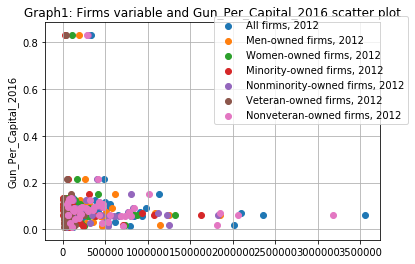

In [91]:
#now lets visualize the insights by plotting a scatter plot for all fact variable
#Graph1: Firms related variable and Gun_Per_Capital
#wil use for loop to create a scatter plot for firms variable in single graph

for col in list(fact):
    if 'firms' in col:
        plt.scatter(fact[col], fact['Gun_Per_Capital_2016'], label = col)
plt.ylabel("Gun_Per_Capital_2016")
plt.title("Graph1: Firms variable and Gun_Per_Capital_2016 scatter plot")
plt.grid(True)
plt.legend(bbox_to_anchor = (1.1, 1.05))
plt.show()

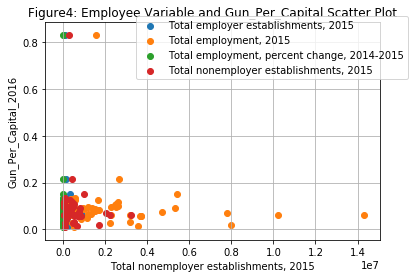

In [92]:
#similarly graph2 with employment variables and GUn_per_capital
for col in list(fact):
    if 'employ' in col:
        plt.scatter(fact[col],fact['Gun_Per_Capital_2016'], label =col)
        plt.xlabel(col)
plt.ylabel("Gun_Per_Capital_2016")
plt.title("Figure4: Employee Variable and Gun_Per_Capital Scatter Plot")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [93]:
#from above two graphs we aren't able to distinguish any significant findings ie., a week relation between these variables.
#so lets keep only 6 variables in our cols list and plot a scatter plot
imp =['White alone, percent, July 1, 2016,  (V2016)',
    'Persons 65 years and over, percent, April 1, 2010',
    'Owner-occupied housing unit rate, 2011-2015',
    'Asian alone, percent, July 1, 2016,  (V2016)',
    'Foreign born persons, percent, 2011-2015', 
    'Median gross rent, 2011-2015']

White alone, percent, July 1, 2016,  (V2016)


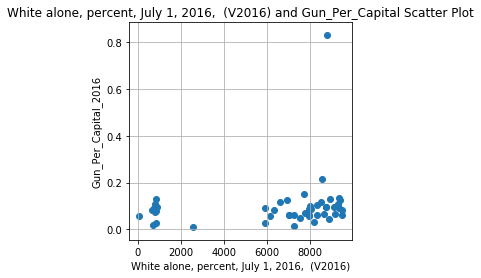

Persons 65 years and over, percent, April 1, 2010


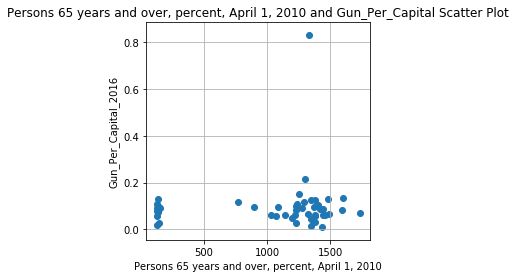

Owner-occupied housing unit rate, 2011-2015


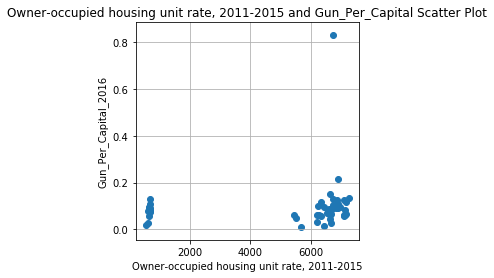

Asian alone, percent, July 1, 2016,  (V2016)


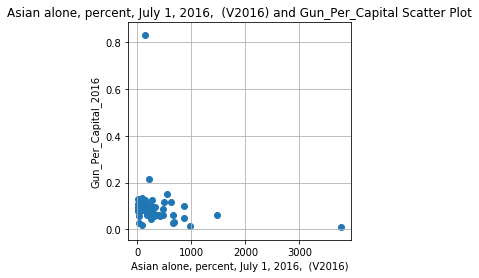

Foreign born persons, percent, 2011-2015


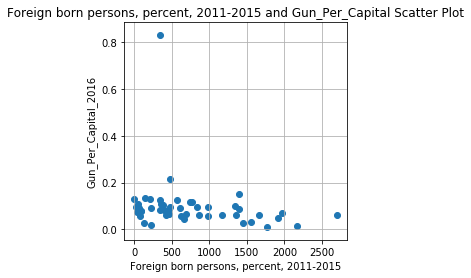

Median gross rent, 2011-2015


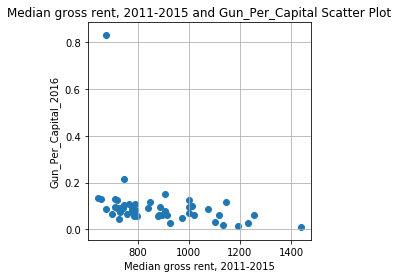

In [94]:
#create scatter plot for all the fact variable in speparate figure, 6 figures
for col in imp:
    plt.figure(figsize=(4,4))
    print(col)
    plt.scatter(fact[col],fact['Gun_Per_Capital_2016'], label =col)
    plt.title(col+" and Gun_Per_Capital Scatter Plot")     
    plt.ylabel("Gun_Per_Capital_2016")
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

## Finding for Research question 1: Based on graphs and results

## The Gun and Census data are divided by state with united state.  High Gun Per Capita should also be calculated by state.
## Among all the state, Kentucky has the highest Gun per Capita in both 2016 as well in 2010, might be that Kentucky is place where people prefer firearms.
## Based on scatter plot between all fact values and Gun per Capita in one figure and grouping by column name, there is no strong association between any high fact value and high gun per capita.
## However, based on the scatter plot for fact variable and gun per capita, separately, there is some weak association found as following:
## There is positive association between gun per capita and variables which includes:
#     'White alone, percent, July 1, 2016, (v2016)',
#     'Persons 65 years and over, percent, April 1, 2010',
#     'Owner-occupied housing unit rate, 2011-2015',
#     
# the negative association between gun per capita and variables which includes:
#     Asian alone, percent, July 1, 2016,  (V2016)
#     Foreign born persons, percent, 2011-2015 
#     Median gross rent, 2011-2015

### Research Question 2  

#  Which states have had the highest growth and the lowest growth in gun registrations?


In [95]:
#Calculate the increasing percentage of gun registrations from 2010 to 2016

result['gun_growth'] = result['totals_16']/(result['totals_16']-result['totals_10'])



In [97]:
# lets find the maximum growth percentage

result['gun_growth'].max()

4.031971662526451

SO maxixum gun growth is 403.1971%...

In [98]:
#List Top 5 rows by gun growth rate descending4

result.nlargest(5,'gun_growth')

,state,totals_16,totals_10,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)",...,"Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code,Gun_Per_Capital_2016,Gun_Per_Capital_2010,gun_growth
1,Alaska,87647,65909,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,...,13688.0,51147.0,7953.0,56091.0,12.0,57064096.0,2.0,0.118140,0.092797,4.031972
49,Wyoming,63594,47709,585501.0,563767.0,390.0,563626.0,650.0,710.0,2370.0,...,4077.0,55397.0,6470.0,51353.0,58.0,9709314.0,56.0,0.108615,0.084625,4.003399
25,Montana,136337,101095,1042520.0,989414.0,540.0,989415.0,600.0,630.0,2180.0,...,5578.0,102746.0,11486.0,93393.0,68.0,14554580.0,30.0,0.130776,0.102177,3.868594
15,Kansas,196548,144156,2907289.0,2853129.0,190.0,2853118.0,670.0,720.0,2460.0,...,26127.0,204562.0,21610.0,203401.0,349.0,8175872.0,20.0,0.067605,0.050526,3.751489
3,Arkansas,266014,191448,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,...,35982.0,189029.0,25915.0,192988.0,56.0,5203548.0,5.0,0.089020,0.065654,3.567497


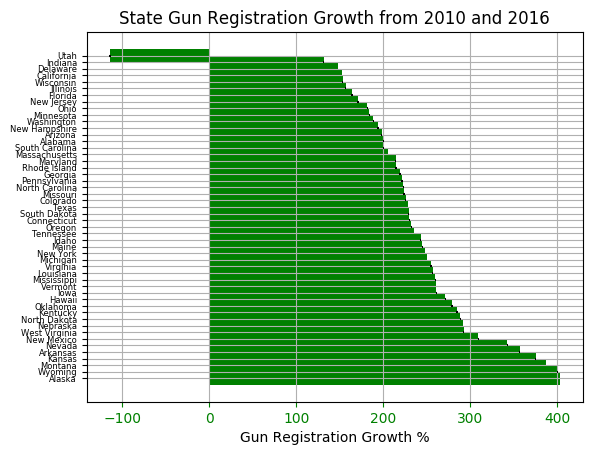

In [99]:
# lets plot a bar graph for every states gun growth:
#Set the figure size for better visualization
plt.figure(figsize=(30,30))

plt.rcdefaults()
fig, ax = plt.subplots()

#Sort result data by gun_growth value
sorted = result.sort_values(by=['gun_growth'])


#create bar chart 
y_pos = np.arange(len(sorted['state']))
error = np.random.rand(len(sorted['state']))
ax.barh(y_pos, (sorted['gun_growth']*100), xerr=error, align='center',height=2,linewidth=5,color='green', ecolor='black')

#set x and y axis lable and make the label readable
ax.set_yticks(y_pos)
ax.set_xlabel("Gun Registration Growth %")
ax.set_yticklabels(sorted['state'],size=6)

#Invert x and y axis
ax.invert_yaxis()  # labels read top-to-bottom

#Set tick colors:
ax.tick_params(axis='x', colors='green')
ax.tick_params(axis='y', colors='black')

#Set the title
plt.title("State Gun Registration Growth from 2010 and 2016")     
plt.grid(True)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()


# From the above graph we could see that only Utah and Indian are two states whose gun growth is decreased more 100%

## Further to computations earlier, Alaska has the highest with 403.20% compared to Apr 2010.

## Alaska and Wyoming are the only two states  whose growth  is more than 400%

### From the graph one more point we could note is that there are 8 countries whose gun growth is more than 300%, we can consider these states are where people trending to possess fire arm(reason might be any security or other reason)


# Research Question 3: 

## We will explore the overall trend for gun purchase from 2010 to 2016 to observe overall trend.



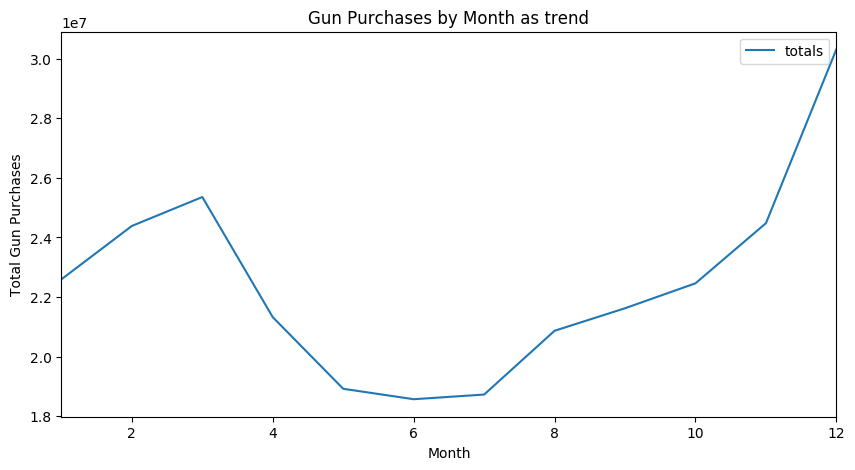

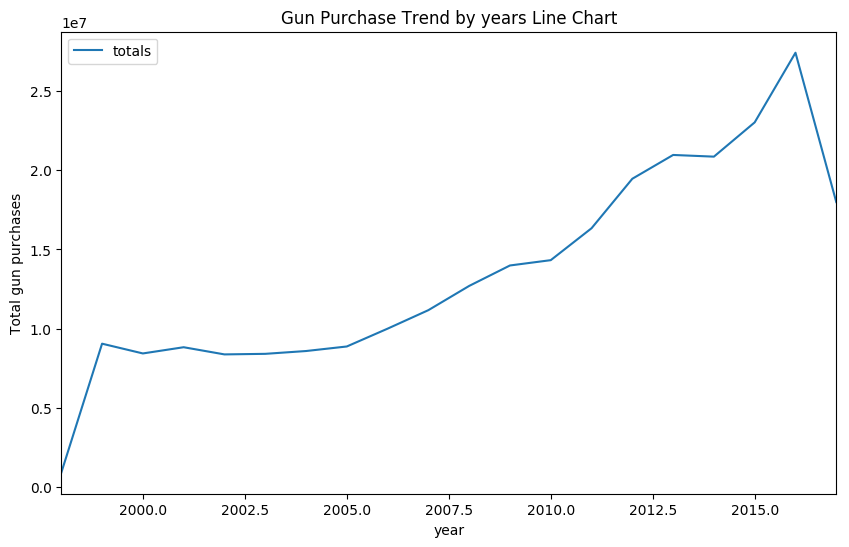

In [101]:
#Lets create line chart using grouped data by year - months, which can be used to observe the change pattern.

#let's give a figure sizze
plt.figure(figsize = (10,5))

gun.groupby('months')['totals'].sum().plot(kind='line',sharex=True, sharey=True, layout = (2,1))
#setting x and y axes label name

plt.xlabel('Month')
plt.ylabel('Total Gun Purchases')
plt.legend()
plt.title('Gun Purchases by Month as trend')
plt.show


#Lets Create line chart using grouped data by year, which can be used to observe the change during the season
plt.figure(figsize=(10,6))
gun.groupby('year')['totals'].sum().plot(kind='line')

plt.ylabel('Total gun purchases')
plt.xlabel('year')
plt.title("Gun Purchase Trend by years Line Chart")
plt.legend()
plt.show()


# From Line graph for trends across year, we can tell that:

## From 1998 to 2016 the gun purchases is increasing.
## From 1999 to 2005, the number of guns is almost stable 
## The gun purchases of 1 million in 2005 increased to more than 2.5 million by the year 2016


# From the line trend for gun purchases by month, we can say below:

## The gun purchases is around 2.3 million in january and is increasing till the month of march(where  it is almost 2.5 million).
## From march we could see that it has started decreasing and reached near to 1.9 million and this 1.9 million is somewhat constant till the month of July.
## From July to december we could see that slope has started increasing which means that gun purchases are increasing.
## the peak gun purchases is clearly for the month of december with over 3 million purchases and next level peak gun purchases happening between january and march.



<a id='conclusions'></a>
## Conclusions
# FBI Gun and census data are two independent data sets. Their common variables/value include state of United States and year month, which requires data cleaning at first. We can join these two dataset to see the relationship between gun purchase and census variable.
# 
# Post Question:
### 1.What census variable or fact value is most associated with high gun per capita per state? 
### Census data includes state as variable, and there are 65 differnt census measurement as value of Fact. 
### 2.Which states have had the highest growth and the lowest growth in gun registrations from Apr 2010 to Jul 2016? 
### 3.What is the overall trend of gun purchases by year or by year and month?
# 
# Findings for the Quesitons:
# 
### 1.The gun and census data are divided by state with United state. High gun per capita should also be calculated by state, except {'District of Columbia','Guam','Mariana Islands','Puerto Rico','Virgin Islands'}. these states' gun total is missing or zero. Among all the state, Kentucky has the highest gun per capita on Jul 2016 and Apr 2010 data. Kentucky,Indiana,Illinois,West Virginia,Montana are the top 5 state who have highes gun per capita on Jul 2016.
also, based on the scatter plot for all the fact value in one figure and group by column name scatterplot,there is no strong association between any fact value and high gun per capita.
### However, based on the scatter plot for fact varible and gun per capita, separately, there is some weak association found as following; the positive association between gun per capita and variables which includes: White alone, percent, July 1, 2016, (V2016) Persons 65 years and over, percent, April 1, 2010 owner-occupied housing unit rate, 2011 -2015
### the negative association between gun per capita and variables which includes:  2011-2015 Asian alone, percent, July 1, 2016, (V2016) Foreign born persons, percent, 2011-2015 Median gross rent, 2011-2015
# 
### 2.Alaska had the highest growth in gun registrations in Jul 2017, increasing by 403.20% compare to Apr 2010.
### Additionally,Alaska,Wyoming,Montana,Kansas,Arkansas are the top 5 state with highest growth in gun registrations in Jul 2017.Alaskas and Wyoming are only two state whose growth more than 400%
### also from the gun growth bar chart for all the states, we can see Utah and Indiana are the only two states whose gun growth are descreasing by more than 100%. On the other hand, there are 8 states' gun growth more than 300%, which can be considered outliers.
# 
# 3.From the line chart for gun purchases by years, we can tell that 
### from 1998 to 2016, the  overall of gun purchases is increasing. 
### From 1999 to 2005, the number of gun purchases remains stable, and from 2005 to 2016, the number of gun purchases increase from about 1 million to 2.7 million. From 2016 to 2017, the  number of gun purchases goes down, which is partially due to only 9 months in 2017 being calculated. 
# 
### The gun purchases is around 2.3 million in january and is increasing till the month of march(where it is almost 2.5 million).
### From march we could see that it has started decreasing and reached near to 1.9 million and this 1.9 million is somewhat constant till the month of July.
### From July to december we could see that slope has started increasing which means that gun purchases are increasing.
### the peak gun purchases is clearly for the month of december with over 3 million purchases and next level peak gun purchases happening between january and march.
# 
# Limitations:
## I have replaced gun data's missing values with mean of each columns and remove 'Fact Note' column since it has exceeding number of Nan values. Missing data can occur because of nonresponse: no information is provided.for the gun data, missing value can be caused by nonreponse or limitation regulation or lack of gathering data. My solution for replacing missing data with mean and drop null columns are not time consuming.
# 
## a. For potential improvement, in statistic, probablity distribution graphic can be used to see variable's distribution(normalized/ right-skewed/left skewed) and make prediction of missing value based on mean/ standard deviation. 
## b. Also, standardization of datasets before exploring it can help show more clear and strong correlation between variable, for example, gun per capital and Fact metrics.
## c. Additionally, the gun data contains many outliers, scaling using the mean and variance of the data is likely to not work very well. In these cases we would need to search for other methods to give brief about stats for these data. 

## Submitting your Project 

In [103]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0